In [1]:
# project: p10
# submitter: kcho36
# partner: djang26

In [2]:
import requests
import os
import pandas as pd
from pandas import Series, DataFrame
from bs4 import BeautifulSoup
import json
import math
#matplotlib inline

In [3]:
def download(filename, url):
    # We do not download again if the file already exists
    if os.path.exists(filename):
        return (str(filename) + " already exists!")

    r = requests.get(url)
    r.raise_for_status()
    data = r.text
    f = open(filename, "w",encoding = "utf-8")
    f.write(data)
    f.close()
    
    return (str(filename) + " created!")

In [4]:
download("countries.json", "https://raw.githubusercontent.com/tylerharter/caraza-harter-com/master/tyler/cs301/fall19/data/countries.json")

'countries.json already exists!'

In [5]:
countries = pd.read_json('countries.json')

In [6]:
pd.read_json('countries.json')

,area,birth-rate,coastline,continent,country,death-rate,gdp-per-capita,infant-mortality,literacy,net-migration,phones,population,region
0,756950,15.23,0.85,South America,Chile,5.81,9900,8.80,"96,2",0.00,"213,0",16134219,LATIN AMER. & CARIB
1,665,17.80,24.21,Asia,Bahrain,4.14,16900,17.27,"89,1",1.05,"281,3",698585,NEAR EAST
2,22966,28.84,1.68,North America,Belize,5.72,4900,25.69,"94,1",0.00,"115,7",287730,LATIN AMER. & CARIB
3,582650,39.72,0.09,Africa,Kenya,14.02,1000,61.47,"85,1",-0.10,"8,1",34707817,SUB-SAHARAN AFRICA
4,11854,33.05,3.12,Australia,Marshall Islands,4.78,1600,29.45,"93,7",-6.04,"91,2",60422,OCEANIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2381740,17.14,0.04,Africa,Algeria,4.61,6000,31.00,"70,0",-0.39,"78,1",32930091,NORTHERN AFRICA
170,103000,13.64,4.83,Europe,Iceland,6.72,30900,3.31,"99,9",2.38,"647,7",299388,WESTERN EUROPE
171,748,25.37,56.02,Australia,Tonga,5.28,2200,12.62,"98,5",0.00,"97,7",114689,OCEANIA
172,27750,36.44,6.38,North America,Haiti,12.17,1600,73.45,"52,9",-3.40,"16,9",8308504,LATIN AMER. & CARIB


In [7]:
countries.head()

,area,birth-rate,coastline,continent,country,death-rate,gdp-per-capita,infant-mortality,literacy,net-migration,phones,population,region
0,756950,15.23,0.85,South America,Chile,5.81,9900,8.80,"96,2",0.00,"213,0",16134219,LATIN AMER. & CARIB
1,665,17.80,24.21,Asia,Bahrain,4.14,16900,17.27,"89,1",1.05,"281,3",698585,NEAR EAST
2,22966,28.84,1.68,North America,Belize,5.72,4900,25.69,"94,1",0.00,"115,7",287730,LATIN AMER. & CARIB
3,582650,39.72,0.09,Africa,Kenya,14.02,1000,61.47,"85,1",-0.10,"8,1",34707817,SUB-SAHARAN AFRICA
4,11854,33.05,3.12,Australia,Marshall Islands,4.78,1600,29.45,"93,7",-6.04,"91,2",60422,OCEANIA


In [8]:
#q1:
len(countries)

174

In [9]:
#q2:
countries["area"].sum()

127170843

In [10]:
download('capitals.html', 'https://raw.githubusercontent.com/tylerharter/cs301-projects/master/fall19/p10/techslides-snapshot.html')

'capitals.html already exists!'

In [11]:
path = "capitals.html"
f = open(path)
text = f.read()
f.close()
soup = BeautifulSoup(text, 'html.parser')
#country_dict = {}
country_list = []
for x in soup.find_all('table'):
    for tr in x.find_all("tr"):
        y = tr.find_all("td")
        country_dict = {}
        country_dict['country'] = y[0].get_text()
        country_dict['capital'] = y[1].get_text()
        country_dict['latitude'] = y[2].get_text()
        country_dict['longtitude'] = y[3].get_text()
        
        if country_dict['country'] not in list(countries["country"]):
            continue
        country_list += [country_dict]
country_list

[{'country': 'Afghanistan',
  'capital': 'Kabul',
  'latitude': '34.51666667',
  'longtitude': '69.183333'},
 {'country': 'Albania',
  'capital': 'Tirana',
  'latitude': '41.31666667',
  'longtitude': '19.816667'},
 {'country': 'Algeria',
  'capital': 'Algiers',
  'latitude': '36.75',
  'longtitude': '3.05'},
 {'country': 'Anguilla',
  'capital': 'The Valley',
  'latitude': '18.21666667',
  'longtitude': '-63.05'},
 {'country': 'Argentina',
  'capital': 'Buenos Aires',
  'latitude': '-34.58333333',
  'longtitude': '-58.666667'},
 {'country': 'Armenia',
  'capital': 'Yerevan',
  'latitude': '40.16666667',
  'longtitude': '44.5'},
 {'country': 'Aruba',
  'capital': 'Oranjestad',
  'latitude': '12.51666667',
  'longtitude': '-70.033333'},
 {'country': 'Australia',
  'capital': 'Canberra',
  'latitude': '-35.26666667',
  'longtitude': '149.133333'},
 {'country': 'Austria',
  'capital': 'Vienna',
  'latitude': '48.2',
  'longtitude': '16.366667'},
 {'country': 'Azerbaijan',
  'capital': 'Ba

In [12]:
f = open("capitals.json", "w", encoding="utf-8")    
json.dump(country_list, f)
f.close()

In [13]:
df = pd.DataFrame(country_list)
df

,country,capital,latitude,longtitude
0,Afghanistan,Kabul,34.51666667,69.183333
1,Albania,Tirana,41.31666667,19.816667
2,Algeria,Algiers,36.75,3.05
3,Anguilla,The Valley,18.21666667,-63.05
4,Argentina,Buenos Aires,-34.58333333,-58.666667
...,...,...,...,...
169,Venezuela,Caracas,10.48333333,-66.866667
170,Vietnam,Hanoi,21.03333333,105.85
171,Yemen,Sanaa,15.35,44.2
172,Zambia,Lusaka,-15.41666667,28.283333


In [14]:
#q3:
sorted(list(df['country']))

['Afghanistan',
 'Albania',
 'Algeria',
 'Anguilla',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakh

In [15]:
#q4:
next(iter(df[df['country']=="Cuba"]['capital']))

'Havana'

In [16]:
#q5:
next(iter(df[df['capital']=="Tbilisi"]['country']))

'Georgia'

In [17]:
#q6:
df["latitude"]=df["latitude"].astype(float)
list(df.sort_values(by="latitude", ascending=True)[:7].country)

['New Zealand',
 'Australia',
 'Uruguay',
 'Argentina',
 'Chile',
 'Lesotho',
 'Swaziland']

In [18]:
#q7:
df["latitude"]=df["latitude"].astype(float)
list(df.sort_values(by="latitude", ascending=False)[:5].country)

['Iceland', 'Finland', 'Norway', 'Estonia', 'Sweden']

In [19]:
#q8:
countries[["birth-rate", "death-rate"]].describe()

,birth-rate,death-rate
count,174.000000,174.000000
mean,22.463851,9.625172
std,11.278992,5.187143
min,8.250000,2.410000
25%,12.597500,6.027500
50%,20.010000,8.230000
75%,29.860000,11.715000
max,50.730000,29.740000


In [20]:
#q9:
for column in countries[["literacy", "phones"]]:
    countries[column] = countries[column].astype(str).str.replace("," , ".").astype(float)
    
countries[["literacy", "phones"]].describe()

,literacy,phones
count,174.000000,174.000000
mean,82.362069,215.770690
std,20.003166,218.713811
min,17.600000,1.300000
25%,70.100000,32.000000
50%,92.100000,140.350000
75%,98.000000,331.750000
max,100.000000,1035.600000


In [21]:
#q10:
next(iter(countries[(countries['continent']=="Europe") & (countries['coastline']==0) ].sort_values(by="area", ascending=False).country))

'Belarus'

In [22]:
#q11:
next(iter(countries[(countries['continent']=="Asia") & (countries['coastline']==0) ].sort_values(by="area", ascending=False).country))

'Kazakhstan'

In [23]:
#q12:
next(iter(countries[(countries['continent']=="Asia") & (countries['coastline']==0) ].sort_values(by="population", ascending=False).country))

'Afghanistan'

In [24]:
def find_distance(lat1,lon1,lat2,lon2):
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)
    a = math.sin((lat2 - lat1)/2)**2 + math.cos(lat1) * math.cos(lat2) * (math.sin((lon2 - lon1)/2)**2)
    c = 2 * math.asin(min(1,math.sqrt(a)))
    d = 3956 * c
    return d

In [25]:
#q13:
find_distance(43.070231,-89.411893,43.074645,-89.384113)

1.433899492072933

In [26]:
def find_loc(country):
    loc= df[df['country'] == country]
    return next(iter(loc.latitude)),next(iter(loc.longtitude))

In [27]:
#q14:
find_distance(float(find_loc("France")[0]),float(find_loc("France")[1]),float(find_loc("Japan")[0]),float(find_loc("Japan")[1]))

6032.330932363535

In [28]:
def find_distance_matrix(countries_list):
    matrix = pd.DataFrame(index = countries_list, columns = countries_list)
    for x in range(len(countries_list)):
        for y in range(len(countries_list)):
            if x != y:
                distance = find_distance(float(find_loc(countries_list[x])[0]),float(find_loc(countries_list[x])[1]),float(find_loc(countries_list[y])[0]), float(find_loc(countries_list[y])[1]))
                matrix.iloc[x,y] = distance
    return matrix.astype(float)

In [29]:
#q15:
find_distance_matrix(['Guam', 'New Zealand', 'Australia'])

,Guam,New Zealand,Australia
Guam,NaN,4239.314912,3377.103870
New Zealand,4239.314912,NaN,1445.147895
Australia,3377.103870,1445.147895,NaN


In [30]:
#q16:
australian_countries = list(countries[countries.continent == "Australia"].country)
australian_matrix = find_distance_matrix(australian_countries)
australian_matrix

,Marshall Islands,French Polynesia,New Zealand,Vanuatu,Palau,Papua New Guinea,Guam,Samoa,New Caledonia,Australia,Fiji,Tonga
Marshall Islands,NaN,3159.856137,3348.725378,1727.328621,2516.301728,2019.144119,1861.584428,1849.150692,2054.905160,3263.901948,1806.972599,2151.129410
French Polynesia,3159.856137,NaN,2668.807328,2765.339382,5447.018761,4265.757856,4961.131713,1496.953816,2864.497308,3920.570216,2102.135722,1686.539411
New Zealand,3348.725378,2668.807328,NaN,1671.641167,4218.188412,2767.607095,4239.314912,2062.548020,1400.483623,1445.147895,1613.916992,1510.219450
Vanuatu,1727.328621,2765.339382,1671.641167,NaN,2882.041892,1527.495923,2687.395771,1349.904435,335.602971,1687.810709,663.967196,1098.016273
Palau,2516.301728,5447.018761,4218.188412,2882.041892,NaN,1453.306058,800.243081,3956.305436,2974.892838,3099.023227,3468.037102,3931.843110
Papua New Guinea,2019.144119,4265.757856,2767.607095,1527.495923,1453.306058,NaN,1591.171595,2789.123270,1552.708901,1786.749660,2174.712829,2623.742354
Guam,1861.584428,4961.131713,4239.314912,2687.395771,800.243081,1591.171595,NaN,3520.883355,2871.868601,3377.103870,3165.570014,3617.512808
Samoa,1849.150692,1496.953816,2062.548020,1349.904435,3956.305436,2789.123270,3520.883355,NaN,1542.152644,2840.091065,716.316054,553.393188
New Caledonia,2054.905160,2864.497308,1400.483623,335.602971,2974.892838,1552.708901,2871.868601,1542.152644,NaN,1375.924712,825.890876,1179.069567
Australia,3263.901948,3920.570216,1445.147895,1687.810709,3099.023227,1786.749660,3377.103870,2840.091065,1375.924712,NaN,2145.768971,2362.766922


In [31]:
#q17:
australian_matrix.mean().sort_values(ascending= True).index[0]

'Vanuatu'

In [32]:
#q18:
australian_matrix.mean().sort_values(ascending= False).index[0]

'French Polynesia'

In [33]:
#q19:
shortest_distance = pd.DataFrame({"nearest":australian_matrix.idxmin(),'distance': australian_matrix.min()}, index=australian_matrix.index)
shortest_distance

,nearest,distance
Marshall Islands,Vanuatu,1727.328621
French Polynesia,Samoa,1496.953816
New Zealand,New Caledonia,1400.483623
Vanuatu,New Caledonia,335.602971
Palau,Guam,800.243081
Papua New Guinea,Palau,1453.306058
Guam,Palau,800.243081
Samoa,Tonga,553.393188
New Caledonia,Vanuatu,335.602971
Australia,New Caledonia,1375.924712


In [34]:
#q20:
furthest_distance = pd.DataFrame({"furthest":australian_matrix.idxmax(),'distance': australian_matrix.max()}, index=australian_matrix.index)
furthest_distance

,furthest,distance
Marshall Islands,New Zealand,3348.725378
French Polynesia,Palau,5447.018761
New Zealand,Guam,4239.314912
Vanuatu,Palau,2882.041892
Palau,French Polynesia,5447.018761
Papua New Guinea,French Polynesia,4265.757856
Guam,French Polynesia,4961.131713
Samoa,Palau,3956.305436
New Caledonia,Palau,2974.892838
Australia,French Polynesia,3920.570216


In [35]:
import sqlite3
conn = sqlite3.connect('countries.db')
countries.to_sql("countries", conn, if_exists="replace", index=False)
df.to_sql("capitals", conn, if_exists="replace", index=False)

In [36]:
#q21:
qry = """
SELECT continent, COUNT() AS `number of countries`
FROM countries
GROUP BY continent
ORDER BY `number of countries`, continent ASC
"""
d1= pd.read_sql(qry, conn)
d1

,continent,number of countries
0,Australia,12
1,South America,12
2,North America,24
3,Asia,38
4,Europe,41
5,Africa,47


In [37]:
#q22:
from matplotlib import pyplot as plt

ax = d1.set_index("continent").plot.bar(color= "black")
ax.set_xlabel("continent")
ax.set_ylabel("number of countries")

Text(0, 0.5, 'number of countries')

In [38]:
#q23:
qry = """
SELECT continent, SUM(population)*1.0/1000000 AS `total population (million)`
FROM countries
GROUP BY continent
ORDER BY `total population (million)`, continent DESC
"""
d= pd.read_sql(qry, conn)
d = d.sort_values("total population (million)", ascending=False).reset_index(drop=True)
d

,continent,total population (million)
0,Asia,3739.902863
1,Africa,807.299195
2,Europe,792.053486
3,North America,515.041558
4,South America,375.441666
5,Australia,32.163025


Text(0, 0.5, 'total population(million)')

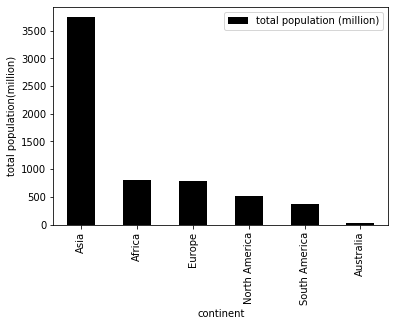

In [39]:
#q24:
ax = d.set_index("continent").plot.bar(color= "black")
ax.set_xlabel("continent")
ax.set_ylabel("total population(million)")

In [40]:
#q25:
qry = """
SELECT country, SUM(population) AS `population`
FROM countries
WHERE continent = "South America"
GROUP BY country
ORDER BY `population`, country DESC
"""
d= pd.read_sql(qry, conn)
d = d.sort_values("population", ascending=False).reset_index(drop=True)
d

,country,population
0,Brazil,188078227
1,Colombia,43593035
2,Argentina,39921833
3,Peru,28302603
4,Venezuela,25730435
5,Chile,16134219
6,Ecuador,13547510
7,Bolivia,8989046
8,Paraguay,6506464
9,Uruguay,3431932


In [41]:
#q26:
qry = """
SELECT country, SUM(population)*SUM("gdp-per-capita")*1.0/1000000000 AS `real GDP (billion)`
FROM countries
GROUP BY country
ORDER BY `real GDP (billion)`, country DESC
"""
d1= pd.read_sql(qry, conn)
d1 = d1.sort_values("real GDP (billion)", ascending=False).reset_index(drop=True)
top_10_country = d1[:10]
top_10_country

,country,real GDP (billion)
0,United States,11281.191327
1,China,6569.868565
2,Japan,3594.473830
3,India,3176.520785
4,Germany,2274.855452
5,France,1680.181354
6,United Kingdom,1678.873538
7,Italy,1552.164690
8,Brazil,1429.394525
9,Russia,1271.752506


In [42]:
other_country = d1[10:].sum()
top_10_country.loc[len(top_10_country)] = ['other', other_country[1]]
top_10_country

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,country,real GDP (billion)
0,United States,11281.191327
1,China,6569.868565
2,Japan,3594.473830
3,India,3176.520785
4,Germany,2274.855452
5,France,1680.181354
6,United Kingdom,1678.873538
7,Italy,1552.164690
8,Brazil,1429.394525
9,Russia,1271.752506


Text(0, 0.5, 'real GDP (billion)')

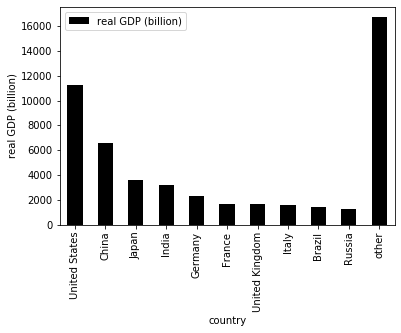

In [43]:
#q27:
ax = top_10_country.set_index("country").plot.bar(color= "black")
ax.set_xlabel("country")
ax.set_ylabel("real GDP (billion)")

In [44]:
#q28:
qry = """
SELECT country, `birth-rate`, `death-rate` 
FROM countries
ORDER BY `birth-rate`-`death-rate` DESC LIMIT 15
"""
d= pd.read_sql(qry, conn)
d

,country,birth-rate,death-rate
0,Uganda,47.35,12.24
1,Yemen,42.89,8.30
2,Mali,49.82,16.89
3,Oman,36.24,3.81
4,Madagascar,41.41,11.11
5,Burkina Faso,45.62,15.60
6,Niger,50.73,20.91
7,Chad,45.73,16.38
8,Mauritania,40.99,12.16
9,Burundi,42.22,13.46


Text(0, 0.5, 'country')

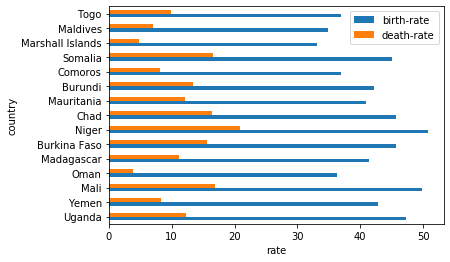

In [45]:
#q29:
ax = d.set_index("country").plot.barh()
ax.set_xlabel("rate")
ax.set_ylabel("country")

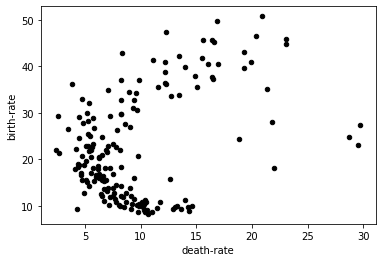

In [46]:
#q30:
qry = """
SELECT country, `birth-rate`, `death-rate` 
FROM countries
ORDER BY `birth-rate`-`death-rate`
"""
d= pd.read_sql(qry, conn)
d.plot.scatter(x='death-rate', y='birth-rate', color = 'black')

In [47]:
#q31:
qry = """
SELECT country, `death-rate`, `birth-rate` 
FROM countries
WHERE `birth-rate` <= 30 AND `death-rate` >= 18
ORDER BY `death-rate` ASC
"""
d= pd.read_sql(qry, conn)
d

,country,death-rate,birth-rate
0,Namibia,18.86,24.32
1,Zimbabwe,21.84,28.01
2,South Africa,22.00,18.20
3,Lesotho,28.71,24.75
4,Botswana,29.50,23.08
5,Swaziland,29.74,27.41


In [48]:
#q32:
qry = """
SELECT country, `birth-rate`, `death-rate` 
FROM countries
ORDER BY `birth-rate`-`death-rate`
"""
d= pd.read_sql(qry, conn)
d.corr()['birth-rate']['death-rate']

0.396508611775251

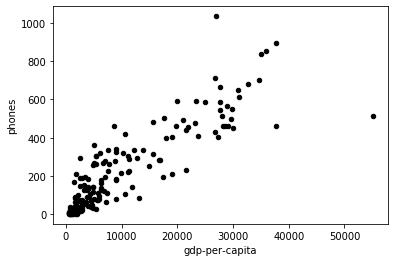

In [49]:
#q33:
qry = """
SELECT country, `gdp-per-capita`, `phones` 
FROM countries
ORDER BY `gdp-per-capita`-`phones`
"""
d= pd.read_sql(qry, conn)
d.plot.scatter(x='gdp-per-capita', y='phones', color = 'black')

In [50]:
#q34:
qry = """
SELECT country, `gdp-per-capita`, `phones` 
FROM countries
ORDER BY `gdp-per-capita`- `phones` 
"""
d= pd.read_sql(qry, conn)
d.corr()['gdp-per-capita']['phones']

0.8786946640591318

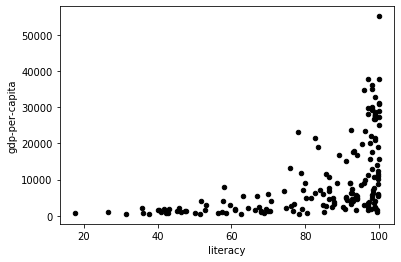

In [51]:
#q35:
qry = """
SELECT country, `literacy`, `gdp-per-capita` 
FROM countries
ORDER BY `literacy`-`gdp-per-capita`
"""
d= pd.read_sql(qry, conn)
d.plot.scatter(x='literacy', y='gdp-per-capita', color = 'black')

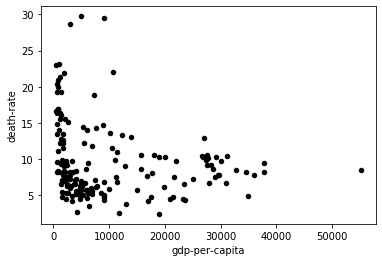

In [52]:
#q36:
qry = """
SELECT country, `gdp-per-capita`, `death-rate` 
FROM countries
ORDER BY `gdp-per-capita`-`death-rate`
"""
d= pd.read_sql(qry, conn)
d.plot.scatter(x='gdp-per-capita', y='death-rate', color = 'black')

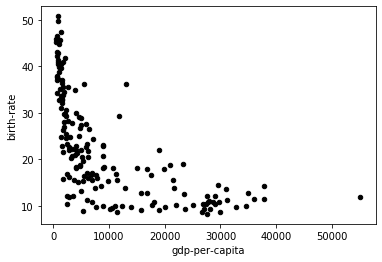

In [53]:
#q37:
qry = """
SELECT country, `gdp-per-capita`, `birth-rate` 
FROM countries
ORDER BY `gdp-per-capita`-`birth-rate`
"""
d= pd.read_sql(qry, conn)
d.plot.scatter(x='gdp-per-capita', y='birth-rate', color = 'black')

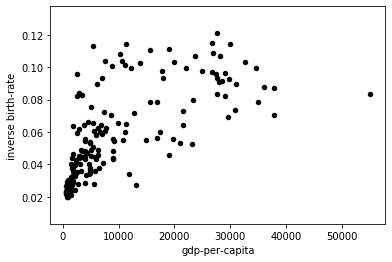

In [54]:
#q38:
qry = """
SELECT country, `gdp-per-capita`, 1/`birth-rate` AS `inverse birth-rate`
FROM countries
ORDER BY `gdp-per-capita`-1/`birth-rate`
"""
d= pd.read_sql(qry, conn)
d.plot.scatter(x='gdp-per-capita', y='inverse birth-rate', color = 'black')

In [55]:
#q39:
import numpy as np

df = DataFrame({
    "x": list(d["gdp-per-capita"]),
    "y": list(d["inverse birth-rate"])
})
df["1"] = 1

res = np.linalg.lstsq(df[["x", "1"]], df["y"], rcond=None)

# res is a tuple: (COEFFICIENTS, VALUE, VALUE, VALUE)
coefficients = res[0] # coefficients is (m,n:
m = coefficients[0] # slope
n = coefficients[1] # intercept

(m,n)

(1.8365703926233416e-06, 0.03916624252079354)

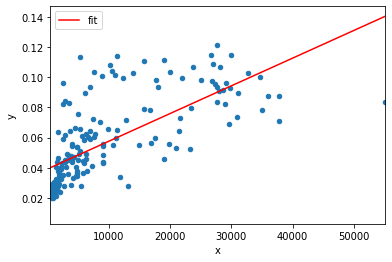

In [56]:
#q40:
ax = df.plot.scatter(x='x', y='y')

df["fit"] = df["x"] * m + n
df.plot.line(x='x', y='fit', c='red', ax=ax)

In [57]:
conn.close()